In [156]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split as tts, GridSearchCV, cross_val_score
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix as cm, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

In [157]:
df = pd.read_csv("Social_Network_Ads.csv")

In [158]:
df["Purchased"].value_counts()

0    257
1    143
Name: Purchased, dtype: int64

In [159]:
import seaborn as sns
import matplotlib.pyplot as plt

In [160]:
import statsmodels.api as sm

In [161]:
df = df.drop(["User ID"],1)

In [162]:
X = df.drop(["Purchased"],1)
y = df["Purchased"]

In [163]:
X = pd.get_dummies(X)

In [164]:
X = X.drop(["Gender_Male"],1)
X = X.iloc[:,:2]

In [165]:
log_reg = LogisticRegression(random_state=42)

In [166]:
scaler = MinMaxScaler()
cols= list(X)
X = scaler.fit_transform(X)
X = pd.DataFrame(X)
X.columns = cols
import warnings
warnings.filterwarnings("ignore")
X_train, X_test, y_train, y_test = tts(X,y,test_size = 0.3, random_state = 42)

In [167]:
log_reg.fit(X_train,y_train)
y_pred = log_reg.predict(X_test)
accuracy_score(y_pred,y_test)

0.8416666666666667

In [168]:
cross_val_score(log_reg, X,y, cv = 10)

array([0.65853659, 0.70731707, 0.92682927, 0.975     , 0.925     ,
       0.875     , 0.775     , 0.82051282, 0.84615385, 0.69230769])

In [169]:
params = {"C":np.arange(0.1,2,0.01), 
         "penalty":["l2", "l1"]}

In [170]:
params

{'C': array([0.1 , 0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 ,
        0.21, 0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31,
        0.32, 0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42,
        0.43, 0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53,
        0.54, 0.55, 0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64,
        0.65, 0.66, 0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75,
        0.76, 0.77, 0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86,
        0.87, 0.88, 0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97,
        0.98, 0.99, 1.  , 1.01, 1.02, 1.03, 1.04, 1.05, 1.06, 1.07, 1.08,
        1.09, 1.1 , 1.11, 1.12, 1.13, 1.14, 1.15, 1.16, 1.17, 1.18, 1.19,
        1.2 , 1.21, 1.22, 1.23, 1.24, 1.25, 1.26, 1.27, 1.28, 1.29, 1.3 ,
        1.31, 1.32, 1.33, 1.34, 1.35, 1.36, 1.37, 1.38, 1.39, 1.4 , 1.41,
        1.42, 1.43, 1.44, 1.45, 1.46, 1.47, 1.48, 1.49, 1.5 , 1.51, 1.52,
        1.53, 1.54, 1.55, 1.56, 1

In [171]:
log_reg_cv = GridSearchCV(log_reg, param_grid=params, cv = 10)

In [172]:
log_reg_cv.fit(X,y)

GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=42, solver='warn',
          tol=0.0001, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'C': array([0.1 , 0.11, ..., 1.98, 1.99]), 'penalty': ['l2', 'l1']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [173]:
log_reg_cv.best_estimator_

LogisticRegression(C=0.33999999999999986, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='warn', n_jobs=None, penalty='l1', random_state=42,
          solver='warn', tol=0.0001, verbose=0, warm_start=False)

In [143]:
log_reg_cv.best_params_

{'C': 0.33999999999999986, 'penalty': 'l1'}

In [144]:
best_model = log_reg_cv.best_estimator_

In [145]:
log_reg_cv.best_score_

0.825

In [146]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train


TypeError: 'Series' objects are mutable, thus they cannot be hashed

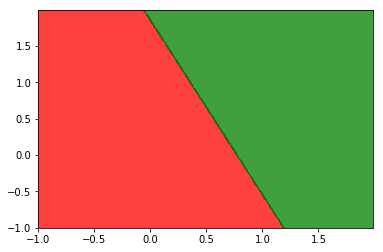

In [174]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set.iloc[:, 0].min() - 1, stop = X_set.iloc[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set.iloc[:, 1].min() - 1, stop = X_set.iloc[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, best_model.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Logistic Regression (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

In [154]:
y_set = pd.DataFrame(y_set)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


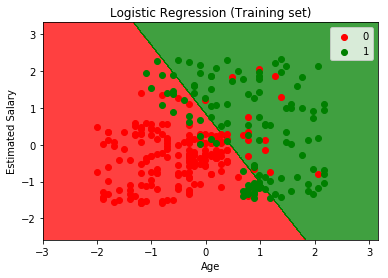

In [212]:
# Logistic Regression

# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Importing the dataset
dataset = pd.read_csv('Social_Network_Ads.csv')
X = dataset.iloc[:, [2, 3]].values
y = dataset.iloc[:, 4].values

# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Fitting Logistic Regression to the Training set
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

# Visualising the Training set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Logistic Regression (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

In [176]:
dataset = pd.read_csv('Social_Network_Ads.csv')
X = dataset.iloc[:, [2, 3]].values
y = dataset.iloc[:, 4].values

In [178]:
X_set, y_set = X_train, y_train

In [189]:
dataset = pd.get_dummies(dataset)

In [191]:
dataset = dataset.drop(["Gender_Male"],1)

In [209]:
dataset.iloc[:,2]

0      0
1      0
2      0
3      0
4      0
5      0
6      0
7      1
8      0
9      0
10     0
11     0
12     0
13     0
14     0
15     0
16     1
17     1
18     1
19     1
20     1
21     1
22     1
23     1
24     1
25     1
26     1
27     1
28     0
29     0
      ..
370    1
371    1
372    0
373    1
374    0
375    1
376    0
377    0
378    1
379    1
380    0
381    1
382    1
383    1
384    1
385    1
386    1
387    0
388    1
389    1
390    1
391    1
392    1
393    1
394    0
395    1
396    1
397    1
398    0
399    1
Name: Purchased, Length: 400, dtype: int64

In [213]:
import os

In [214]:
os.getcwd()

'/Users/Arunabh/Downloads/Logistic_Regression'

In [215]:
os.chdir("/Users/Arunabh/Downloads/")

In [225]:
df = pd.read_csv("startup_funding.csv")

In [226]:
df.head()

,SNo,Date,StartupName,IndustryVertical,SubVertical,CityLocation,InvestorsName,InvestmentType,AmountInUSD,Remarks
0,0,01/08/2017,TouchKin,Technology,Predictive Care Platform,Bangalore,Kae Capital,Private Equity,"1,300,000",NaN
1,1,02/08/2017,Ethinos,Technology,Digital Marketing Agency,Mumbai,Triton Investment Advisors,Private Equity,NaN,NaN
2,2,02/08/2017,Leverage Edu,Consumer Internet,Online platform for Higher Education Services,New Delhi,"Kashyap Deorah, Anand Sankeshwar, Deepak Jain,...",Seed Funding,NaN,NaN
3,3,02/08/2017,Zepo,Consumer Internet,DIY Ecommerce platform,Mumbai,"Kunal Shah, LetsVenture, Anupam Mittal, Hetal ...",Seed Funding,"500,000",NaN
4,4,02/08/2017,Click2Clinic,Consumer Internet,healthcare service aggregator,Hyderabad,"Narottam Thudi, Shireesh Palle",Seed Funding,"850,000",NaN


In [227]:
df = df.drop(["SNo"],1)

In [228]:
df = df.drop(["Date"],1)

In [231]:
df = df.drop(["Remarks"],1)

In [236]:
for column in list(df):
    df[column].fillna(df[column].mode()[0], inplace=True)

In [237]:
df["SubVertical"].mode()

0    Online Pharmacy
dtype: object

In [244]:
df["AmountInUSD"] = df["AmountInUSD"].str.replace(",", "").astype(int)

In [251]:
le = LabelEncoder()
for x in list(df)[:-1]:
    df[x] = le.fit_transform(df[x])

In [253]:
import pandas as pd
import numpy as np
import scipy.stats as stats
from scipy.stats import chi2_contingency

class ChiSquare:
    def __init__(self, dataframe):
        self.df = dataframe
        self.p = None #P-Value
        self.chi2 = None #Chi Test Statistic
        self.dof = None
        
        self.dfTabular = None
        self.dfExpected = None
    def _print_chisquare_result(self, colX, alpha):
        result = ""
        if self.p<alpha:
            result="{0} is IMPORTANT for Prediction".format(colX)
        else:
            result="{0} is NOT an important predictor. (Discard {0} from model)".format(colX)

        print(result)
    def TestIndependence(self,colX,colY, alpha=0.05):
        X = self.df[colX].astype(str)
        Y = self.df[colY].astype(str)
        
        self.dfObserved = pd.crosstab(Y,X) 
        chi2, p, dof, expected = stats.chi2_contingency(self.dfObserved.values)
        self.p = p
        self.chi2 = chi2
        self.dof = dof 
        
        self.dfExpected = pd.DataFrame(expected, columns=self.dfObserved.columns, index = self.dfObserved.index)
        
        self._print_chisquare_result(colX, alpha)

In [255]:
cT = ChiSquare(df)

#Feature Selection
testColumns = list(df)[:-1]
for var in testColumns:
    cT.TestIndependence(colX=var,colY="AmountInUSD" )  

StartupName is NOT an important predictor. (Discard StartupName from model)
IndustryVertical is NOT an important predictor. (Discard IndustryVertical from model)
SubVertical is NOT an important predictor. (Discard SubVertical from model)
CityLocation is NOT an important predictor. (Discard CityLocation from model)
InvestorsName is IMPORTANT for Prediction
InvestmentType is IMPORTANT for Prediction


In [256]:
X = df.drop(["AmountInUSD"],1)

In [257]:
y = df["AmountInUSD"]

In [266]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score

In [308]:
dtr = DecisionTreeRegressor(max_depth=4, min_samples_leaf=3, min_samples_split=5)

In [310]:
X_train, X_test, y_train, y_test = tts(X,y,test_size = 0.2, random_state = 42)
dtr.fit(X_train,y_train)
y_pred = dtr.predict(X_test)
r2_score(y_pred,y_test)

0.38602726795034314

In [312]:
bins = [0, 500000, 1000000, 1500000,2000000, 2500000, 10000000]
labels = ["0-0.5m","0.5m-1m","1m-1.5m","1.5m-2m","2m-2.5m","2.5m and above"]
df['binned'] = pd.cut(df['AmountInUSD'], bins=bins, labels=labels)

In [314]:
df["binned"].value_counts()

0.5m-1m           1073
0-0.5m             535
2.5m and above     322
1.5m-2m             75
1m-1.5m             73
2m-2.5m             35
Name: binned, dtype: int64

In [326]:
df = df[df["AmountInUSD"]<=1100000]

In [327]:
X = df.drop(["AmountInUSD", "binned"],1)
y = df["AmountInUSD"]

In [328]:
dtr = DecisionTreeRegressor(max_depth=4, min_samples_leaf=3, min_samples_split=5)

In [329]:
X_train, X_test, y_train, y_test = tts(X,y,test_size = 0.2, random_state = 42)
dtr.fit(X_train,y_train)
y_pred = dtr.predict(X_test)
r2_score(y_pred,y_test)

-2.0305377469694146

35      200000
481     100000
528      45000
2083    200000
1530    150000
1923     20000
872     250000
1662     77000
1213    360000
1612    540000
1198    250000
1458    250000
2027    140000
635     150000
1004    150000
1829     80000
237     245000
362      40000
2070    250000
344     400000
64      350000
1883    400000
1501    200000
2038    500000
1571    300000
1756    600000
402     441000
1156    500000
1553    150000
385     100000
         ...  
1771    800000
2129    200000
1007    500000
105     311000
1216    300000
1724    600000
693     300000
1097    750000
795     200000
1476    600000
1567    600000
1838    100000
1301    300000
1202    108000
591     200000
465     450000
1414    150000
408     300000
1722    100000
1250     81000
899      75000
1751    410000
572     100000
2328    125000
97      500000
358      40000
489      50000
1079    500000
1652    190000
476     150000
Name: AmountInUSD, Length: 504, dtype: int64